In [3]:
#Emergent Non-Markovian Gain in Open Quantum Systems
#https://arxiv.org/pdf/2503.21739
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

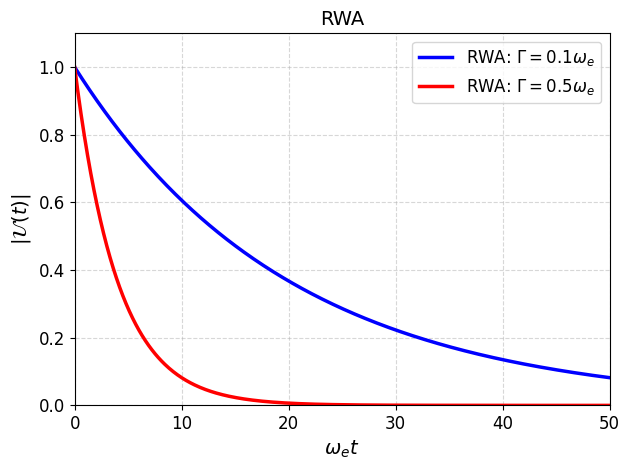

In [5]:
omega_e = 1.0              
Delta = 0.5 * omega_e        
Gamma_list = [0.1 * omega_e, 0.5 * omega_e]
labels = [r'$\Gamma=0.1\omega_e$', r'$\Gamma=0.5\omega_e$']
colors = ['blue', 'red']
t_span = np.linspace(0, 50, 500)
N = 20                       

a = destroy(N)
H = Delta * a.dag() * a
psi0 = basis(N, 1) 
for i, Gamma in enumerate(Gamma_list):
    c_ops = [np.sqrt(Gamma) * a]
    result = mesolve(H, psi0, t_span, c_ops, e_ops=[a.dag() * a])
    n_t = result.expect[0]
    u_abs = np.sqrt(np.abs(n_t))
    plt.plot(t_span, u_abs,           
             color=colors[i], 
             linewidth=2.5,
             label=f'RWA: {labels[i]}')
plt.title(r'RWA' , fontsize=14)
plt.xlabel(r'$\omega_e t$', fontsize=14)
plt.ylabel(r'$|\mathcal{U}(t)|$', fontsize=14)
plt.xlim(0, 50)
plt.ylim(0, 1.1)  
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig('fig2_rwa.png', dpi=300)
plt.show()